# [조별실습] Python을 활용한 AI 모델링 - 머신러닝 파트
+ 이번 실습에서는 Python을 활용한 AI 모델링에서 머신러닝에 대해 실습합니다.
+ 머신러닝 모델에는 아래와 같은 모델들이 있습니다.
+ 단일 분류예측 모델 : 두 개 이상의 클래스 중 하나로 입력 데이터를 분류하는 모델 (Ex.이메일이 스팸인지 아닌지 판별) 
+ (함수) LogisticRegression, KNN, DecisionTree
+ 앙상블 모델 : 여러 개의 기본 모델을 조합하여 하나의 예측 모델을 생성하는 방법, 단일 모델의 한계와 단점 극복
+ (함수) RandomForest, XGBoost, LGBM
+ 시험에서 머신러닝 파트는 명확한 하이퍼파라미터(조건값)에 따라 정해진 템플릿에 맞춰서
+ 조건값을 넣고 코딩하면 되기 때문에 몇 가지 정의된 함수를 습득하면 딥러닝보다 비교적 쉽게 코딩할 수 있습니다.
+ <font color=red>(Tip) 머신러닝, 딥러닝 파트는 코드가 길기 때문에 답변 작성 중간에 꼭 [임시저장] 버튼을 클릭해주세요.
+ '데이터확인-전처리-AI모델선정-학습데이터 분할>학습>성능평가'의 전반적인 AI모델링 프로세스가 출제됩니다.
+ <font color=red>(Tip) 샘플문항을 여러 번 풀어보시고 주요 분류예측 모델과 앙상블 모델별 학습방법을 숙지합시다.
+ <span style="background-color:#fff6b1">**[문제]라고 표기된 부분이 실제 점수가 반영되는 시험문제라고 생각하고 더 신경써서 수행해주세요!**

##  <span style="background-color:#fff5b1">학습목차

 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
 - 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM 

## <span style="background-color:#fff5b1"> [미션] 머신러닝 모델 프로세스 따라가기
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리를 임포트해주세요.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

#### data_v1_save.csv 파일 읽어오기

In [13]:
# '01_전처리'에서 저장한 data_v1_save.csv 파일 읽기
df = pd.read_csv('data_v1_save.csv')


## ③ 데이터 분석

#### 열, 행 파악하기

In [4]:
# info 함수 활용
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   Partner           7027 non-null   object 
 2   Dependents        7027 non-null   object 
 3   tenure            7027 non-null   int64  
 4   MultipleLines     7027 non-null   object 
 5   InternetService   7027 non-null   object 
 6   OnlineSecurity    7027 non-null   object 
 7   OnlineBackup      7027 non-null   object 
 8   TechSupport       7027 non-null   object 
 9   StreamingTV       7027 non-null   object 
 10  StreamingMovies   7027 non-null   object 
 11  Contract          7027 non-null   object 
 12  PaperlessBilling  7027 non-null   object 
 13  PaymentMethod     7027 non-null   object 
 14  MonthlyCharges    7027 non-null   float64
 15  TotalCharges      7027 non-null   float64
 16  Churn             7027 non-null   int64  


In [5]:
# tail 함수 활용
df.tail()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7022,Female,No,No,72,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7023,Male,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7024,Female,Yes,Yes,72,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7025,Female,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7026,Male,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


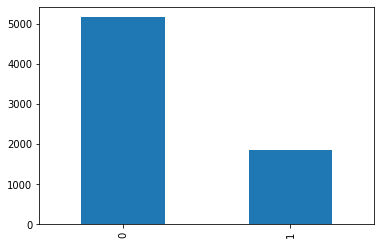

In [6]:
# Churn 레이블의 각 고유값 빈도를 계산하여 막대그래프(bar) 그리기
df['Churn'].value_counts().plot(kind = 'bar')
plt.show()

## ④ 데이터 전처리

+ 모든 데이터값들은 숫자형으로 되어야 합니다. 즉, Ojbect 타입을 숫자형으로 변경이 필요합니다.
+ Object 컬럼에 대해 Pandas get_dummies 함수를 활용하여 One-Hot-Encoding 해보자.

In [7]:
# MultipleLines 컬럼 내용 보기, head 함수 활용
df['MultipleLines'].head()

0                  No
1                  No
2    No phone service
3                  No
4                 Yes
Name: MultipleLines, dtype: object

In [14]:
# MultipleLines 컬럼에 대한 분포 확인 : 3가지(No, Yes, No phone service) 되어 있음 확인
df['MultipleLines'].value_counts()


No                  3380
Yes                 2966
No phone service     681
Name: MultipleLines, dtype: int64

In [15]:
# MultipleLines 컬럼 값들이 문자열로 되어 있어 숫자로 변환하기
# 컴퓨터가 이해할 수 있도록 object 컬럼의 데이터를 원-핫-인코딩해서 숫자로 변경 : Pandas get_dummies()
df['MultipleLines'] = pd.get_dummies(df['MultipleLines'])

In [18]:
# object 타입의 컬럼 확인, select_dtypes 함수 활용
df.select_dtypes('object').columns


Index(['gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [19]:
# object 컬럼명 수집, cal_cols로 저장, 출력
cal_cols = df.select_dtypes('object')


#####
#### <font color=blue> **[문제1] Object 컬럼에 대해 One-Hot-Encoding을 수행하고 그 결과를 df1 변수에 저장하세요.** </font>

In [21]:
# Pandas get_dummies() 함수 이용
# 원-핫-인코딩 결과를 df1 저장
df1 = df.copy()
for col in cal_cols:
    df1[col] = pd.get_dummies(df1[col])

In [22]:
# info 함수 활용, df1의 모든 컬럼 데이터가 숫자형임을 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   uint8  
 1   Partner           7027 non-null   uint8  
 2   Dependents        7027 non-null   uint8  
 3   tenure            7027 non-null   int64  
 4   MultipleLines     7027 non-null   uint8  
 5   InternetService   7027 non-null   uint8  
 6   OnlineSecurity    7027 non-null   uint8  
 7   OnlineBackup      7027 non-null   uint8  
 8   TechSupport       7027 non-null   uint8  
 9   StreamingTV       7027 non-null   uint8  
 10  StreamingMovies   7027 non-null   uint8  
 11  Contract          7027 non-null   uint8  
 12  PaperlessBilling  7027 non-null   uint8  
 13  PaymentMethod     7027 non-null   uint8  
 14  MonthlyCharges    7027 non-null   float64
 15  TotalCharges      7027 non-null   float64
 16  Churn             7027 non-null   int64  


In [23]:
# df1 확인
df1

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,34,1,1,0,1,1,1,1,0,1,0,56.95,1889.50,0
1,0,1,1,2,1,1,0,0,1,1,1,1,0,0,53.85,108.15,1
2,0,1,1,45,0,1,0,1,0,1,1,0,1,1,42.30,1840.75,0
3,1,1,1,2,1,0,1,1,1,1,1,1,0,0,70.70,151.65,1
4,1,1,1,8,0,0,1,1,1,0,0,1,0,0,99.65,820.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,1,1,1,72,1,0,0,0,0,0,0,0,0,1,21.15,1419.40,0
7023,0,0,0,24,0,1,0,1,0,0,0,0,0,0,84.80,1990.50,0
7024,1,0,0,72,0,0,1,0,1,0,0,0,0,0,103.20,7362.90,0
7025,1,0,0,11,0,1,0,1,1,1,1,1,0,0,29.60,346.45,0


## ⑤ Train, Test  데이터셋 분할

#### 입력(X)과 레이블(y) 나누기

#### <font color=blue> **[문제2] df1 DataFrame에서 'Churn' 컬럼을 제외한 나머지 정보를 X에 저장하세요.** </font>

In [24]:
# drop 함수 활용, 'Churn' 컬럼 삭제
# DataFrame에서 values만 X에 저장
# X는 df1으로 저장
df1 = df1.drop('Churn', axis=1)
x = df1

#### <font color=blue> **[문제3] df DataFrame에서 'Churn' 컬럼을 y로 저장하세요.** </font>

In [25]:
# DataFrame 'Churn' 컬럼 사용
# DataFrame에서 values만 y에 저장
y = df['Churn']


In [28]:
# X와 y의 타입을 확인


#### Train , test dataset 나누기

#### <font color=blue> **[문제4] Train dataset, Test dataset을 나누세요.** </font>

In [30]:
# sklearn 라이브러리에서 train_test_split 함수 가져오기
from sklearn.model_selection import train_test_split


In [31]:
# 입력 : X, y 
# Train : Test 비율 = 7:3
# y Class 비율을 유지하면서 나누기 : stratify=y
# 여러 번 수행해도 같은 결과 나오게 고정 : random_state=42 
# 결과 : X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

In [33]:
# X_train 배열의 형태 확인
X_train.shape


(4918, 16)

In [34]:
# y_train 배열의 형태 확인
y_train.shape


(4918,)

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [35]:
# df1, 숫자 분포 이루어진 컬럼 확인, tail 함수 활용
df1.tail()


,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7022,1,1,1,72,1,0,0,0,0,0,0,0,0,1,21.15,1419.40
7023,0,0,0,24,0,1,0,1,0,0,0,0,0,0,84.80,1990.50
7024,1,0,0,72,0,0,1,0,1,0,0,0,0,0,103.20,7362.90
7025,1,0,0,11,0,1,0,1,1,1,1,1,0,0,29.60,346.45
7026,0,0,1,4,0,0,1,1,1,1,1,1,0,0,74.40,306.60


In [37]:
# scikit-learn 라이브러리에서 MinMaxScaler 클래스 가져오기
# Min-Max는 데이터의 최소값, 최대값을 이용해 데이터를 특정범위(0과 1사이)로 스케일링 
from sklearn.preprocessing import MinMaxScaler


#### <font color=blue> **[문제5] MinMaxScaler 함수를 'scaler'로 정의 하세요.** </font>

In [40]:
# 정의할 결과를 'scaler'로 매핑, MinMaxScaler 객체를 scaler로 생성
# 훈련 데이터에 fit 메서드 적용, transform 메서드로 데이터 변환
# 앞서 fit()에서 계산된 최소값과 최대값을 사용하여 테스트 데이터셋 X_test도 동일하게 스케일링
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# X_train과 y_train에서 처음 두개의 행 가져오기
# 데이터가 올바르게 스케일링되었는지 확인 (0과 1 내에 있는지)
print(X_train[0])
print(y_train[0])

[1.         1.         1.         0.65277778 1.         0.
 0.         1.         1.         1.         1.         1.
 1.         0.         0.56851021 0.40877722]
0


## ⑦ 모델 개발 (참고 코드)

#### 모델별 bar 차트를 그려주고, 성능 확인을 시각화하기 위한 함수 코드입니다.
#### 시험에는 출제되지 않는 범위이므로 주어진 코드를 실행하고 아래 단계로 넘어가세요.

In [52]:
# 모델별로 Recall 점수 저장
# 모델 Recall 점수 순서대로 바차트를 그려 모델별로 성능 확인 가능

from sklearn.metrics import accuracy_score

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# 모델명, 예측값, 실제값을 주면 위의 plot_predictions 함수 호출하여 Scatter 그래프 그리며
# 모델별 MSE값을 Bar chart로 그려줌

def recall_eval(name_, pred, actual):
    global predictions
    global colors

    plt.figure(figsize=(12, 9))

    #acc = accuracy_score(actual, pred)
    acc = recall_score(actual, pred)
    my_predictions[name_] = acc * 100

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'recall'])
    print(df)
   
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['recall'])
    
    for i, v in enumerate(df['recall']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('recall', fontsize=18)
    plt.xlim(0, 100)
    
    plt.show()

## ⑧ 모델 성능 평가

###  
### **단일 분류 예측 모델**
### 1) 로지스틱 회귀 (LogisticRegression, 분류)

In [42]:
# 아래 라이브러리를 실행하세요.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

#### <font color=blue> **[문제6] LogisticRegression 모델을 정의하고 학습시키세요.** </font>

In [43]:
# LogisticRegression 함수 사용 및 정의 : lg 저장
# 정의된 LogisticRegression 학습 fit() : 입력값으로 X_train, y_train
lg = LogisticRegression()
lg.fit(X_train, y_train)
pred = lg.predict(X_test)

In [44]:
# 분류기 성능 평가(score)하기, 1에 가까울수록 모델의 성능 좋음
accuracy_score(y_test, pred)


0.7970602181128497

- 분류기 성능 평가 지표

In [29]:
# X_test에 대한 예측 수행, predict() 함수 사용
# lg_pred로 저장



In [45]:
# 모델 성능 평가를 위한 Confusion Matrix 생성(오차행렬)
# y_test는 실제 레이블을, lg_pred는 모델이 예측한 레이블
confusion_matrix(y_test, pred)


array([[1364,  185],
       [ 243,  317]])

In [31]:
# 정확도 구하기(y_test, lg_pred) : 전체 샘플 중 올바르게 예측한 샘플의 비율
  

In [46]:
# 정밀도 구하기(y_test, lg_pred) : True로 예측한 샘플 중 실제로 True인 샘플의 비율
 precision_score(y_test, pred)

0.6314741035856574

In [47]:
# 재현율 구하기(y_test, lg_pred) : 실제 True인 샘플 중 True로 예측한 샘플의 비율
recall_score(y_test, pred)

0.5660714285714286

In [48]:
# F1 Score 구하기(y_test, lg_pred) : 정밀도와 재현율의 조화평균
f1_score(y_test, pred)

0.5969868173258004

In [35]:
# LogisticRegression 모델 예측에 대한 분류 리포트 생성, 출력
# 정밀도, 재현율, F1-점수와 같은 다양한 분류 지표를 종합적으로 살펴보고, 모델이 클래스를 얼마나 잘 분류하는지
# 전체적으로 어떤 성능을 보이는지 판단해보자



In [36]:
# 참고코드로 제공한 recall_eval 함수 호출
# 모델 이름 : LogisticRegression
# 예측값 : lg_pred
# 실제값 : y_test
# 재현율(recall) 계산하고 시각화하기



###   
### 2) KNN (K-Nearest Neighbor)

In [49]:
# KNeighborsClassifier 불러오기
from sklearn.neighbors import KNeighborsClassifier


#### <font color=blue> **[문제7] KNN 모델을 정의하고 학습시키세요.** </font>

In [51]:
# n_neighbors=5 설정
# fit() 함수 사용, X_train과 y_train 데이터로 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

                    model    recall
0  KNeighborsClassifier()  63.14741


<Figure size 864x648 with 0 Axes>

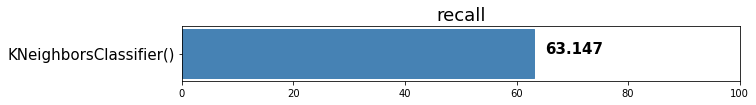

In [54]:
# recall_eval 함수 호출, KNN 모델의 재현율을 계산하고 시각화하기
# knn_pred는 KNN모델 예측 값, y_test는 실제 값
recall_eval(knn, y_test, pred)


###  
### 3) 결정트리(DecisionTree)

In [55]:
# 아래 라이브러리를 실행하세요.

from sklearn.tree import DecisionTreeClassifier

#### <font color=blue> **[문제8] 학습된 DecisionTreeClassifier 모델로 예측해 보세요** </font>

In [56]:
# DecisionTreeClassifier 학습 모델 : dt
# 트리 최대깊이 : 10, random_state=42
dt = DecisionTreeClassifier(max_depth = 10, random_state=42)

# fit() 함수 활용하여 모델 학습
# 입력값 : X_train, y_train
dt.fit(X_train, y_train)

# DecisionTreeClassifier 모델의 predict() 활용 : 입력값으로 X_test
# 결과 : dt_pred 저장
dt_pred = dt.predict(X_test)


                                               model    recall
0                             KNeighborsClassifier()  63.14741
1  DecisionTreeClassifier(max_depth=10, random_st...  63.14741


<Figure size 864x648 with 0 Axes>

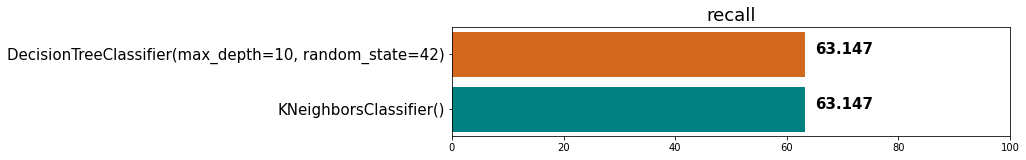

In [57]:
# recall_eval 함수 호출, DecisionTree 모델의 재현율을 계산하고 시각화하기
# dt_pred는 DecisionTree 모델 예측 값, y_test는 실제 값
recall_eval(dt, y_test, pred)


###  
### **앙상블 기법의 종류**
- 배깅 (Bagging) : 여러 개의 모델을 훈련시켜, 그 결과를 결합하여 샘플 중복 생성을 통해 결과 도출(Ex. RandomForest)
- 부스팅 (Boosting): 약한 모델을 여러 개 만들어 순차적으로 학습, 이전 학습에 대해 잘못 예측된 데이터에 가중치를 부여, 오차를 보완하는 방식.(Ex. XGBoost, LGBM)

![앙상블](https://teddylee777.github.io/images/2019-12-18/image-20191217144823555.png)

###  
### 4) 랜덤포레스트(RandomForest)
+ Bagging의 대표적인 모델로써, 훈련셋트를 무작위로 각기 다른 서브셋으로 데이터셋을 만들고
+ 여러 개의 DecisonTree로 학습하고 다수결로 결정하는 모델입니다.

**주요 Hyperparameter**
##### 파라미터들을 조절하면서 모델의 성능을 높이거나 과대적합/과소적합 문제를 해결합니다.

- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝하세요!
- n_jobs: CPU 사용 갯수 (여러 코어를 사용하면 모델 학습이 빨라짐)
- max_depth: 깊어질 수 있는 최대 깊이. 너무 깊은 트리는 과대적합 발생할 수 있음
- n_estimators: 앙상블하는 트리의 갯수
- max_features: 최대로 사용할 feature의 갯수. 값이 작을수록 과대적합 방지함
- min_samples_split: 트리가 분할할 때 필요한 최소 샘플 수. 이 값을 증가시키면 각 분할에 샘플이 많이 필요해서 과대적합 방지함

In [58]:
# 아래 라이브러리를 실행해주세요.

from sklearn.ensemble import RandomForestClassifier

#### <font color=blue> **[문제9] 학습된 RandomForestClassifier 모델로 예측해 보세요** </font>

In [60]:
# n_estimators=3, random_state=42로 RandomForest 객체 생성 후 rfc에 저장
rfc = RandomForestClassifier(n_estimators = 3, random_state=42)
# 훈련 데이터로 모델(rfc) 훈련
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [61]:
# X_test를 사용하여 rfc 모델로 예측, 결과를 rfc_pred에 저장
rfc_pred = rfc.predict(X_test)


                                               model     recall
0                             KNeighborsClassifier()  63.147410
1  DecisionTreeClassifier(max_depth=10, random_st...  63.147410
2  (DecisionTreeClassifier(max_features='auto', r...  55.882353


<Figure size 864x648 with 0 Axes>

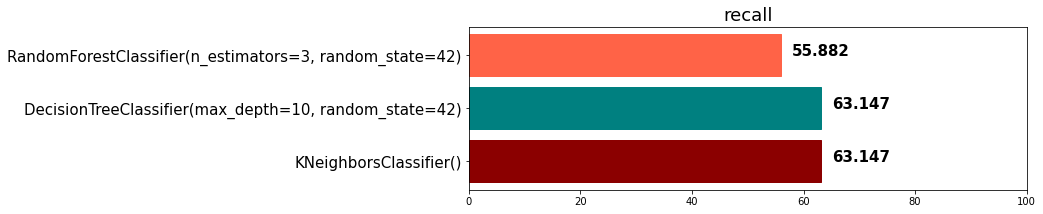

In [62]:
# recall_eval 함수 호출, 'RandomForest Ensemble' 모델의 rfc_pred, y_test를 사용해 재현율 평가 실행
recall_eval(rfc, y_test, rfc_pred)


###  
### 5) XGBoost
+ 여러 개의 약한 DecisionTree를 결합하여 강력한 예측모델을 만드는 Boosting 방식을 사용하는 앙상블 기법
+ Kaggle 대회에서 자주 사용하는 모델이며, 실제 업계에서도 높은 성능을 지닌 예측 모델을 만드는데 활용됨

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 효율적인 알고리즘과 여러 최적화 기술로 성능이 우수함
- GBM보다는 빠르고 성능도 향상되었습니다.
- 대규모 데이터셋엥서는 학습 시간이 오래 걸릴 수 있음
- 데이터셋이 작거나 노이즈가 많은 경우, 과적합 위험이 있음 (트리 최대깊이 지정 등 완화)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝하세요!
- n_jobs: CPU 사용 갯수 (여러 코어를 사용하면 모델 학습이 빨라짐)
- learning_rate: 학습율. 너무 큰 학습율은 성능이 떨어질 수 있고 너무 낮으면 학습이 느려져서 적절한 값을 찾아야 함, default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 너무 높으면 과적합, 너무 낮으면 성능이 떨어짐. default=3. 
- subsample: 샘플 사용 비율(0~1 사이의 값), 과대적합 방지용.
- max_features: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

In [63]:
# XGBoost 패키지를 pip을 통해 설치

!pip install xgboost

In [64]:
# 아래 라이브러리를 실행하세요.

from xgboost import XGBClassifier

#### <font color=blue> **[문제10] 학습된 XGBoostClassifier 모델로 예측해 보세요** </font>

In [65]:
# XGBoost 분류기 생성(xgb 변수 저장), 학습 데이터로 모델 훈련
# n_estimators=3, random_state=42
xgb = XGBClassifier(n_estimators=3, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(n_estimators=3, random_state=42)

In [66]:
# X_test를 사용해 XGBoost 모델로 예측값 생성하고 xgb_pred에 저장
xgb_pred = xgb.predict(X_test)

                                               model     recall
0     XGBClassifier(n_estimators=3, random_state=42)  67.036011
1                             KNeighborsClassifier()  63.147410
2  DecisionTreeClassifier(max_depth=10, random_st...  63.147410
3  (DecisionTreeClassifier(max_features='auto', r...  55.882353


<Figure size 864x648 with 0 Axes>

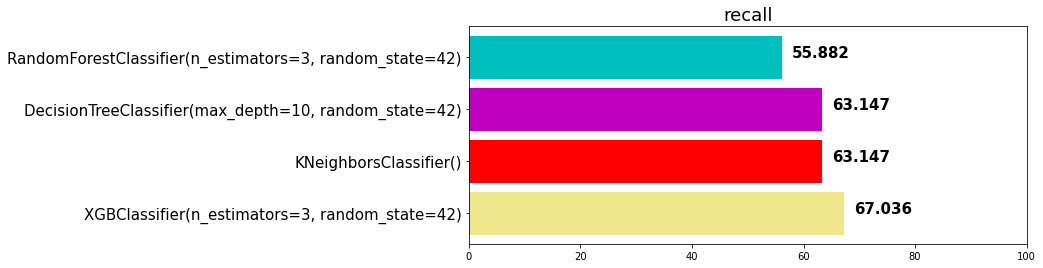

In [67]:
# recall_eval 함수 호출, 'XGBoost' 모델의 예측 결과를 사용해 재현율 평가
# 인수 : xgb_pred, y_test
recall_eval(xgb, y_test, xgb_pred)

###  
### 6) Light GBM
+ XGBoost와 함께 주목받는 DecisionTree 알고리즘 기반의 Boosting 방식의 앙상블 기법
+ XGBoost에 비해 학습시간이 짧은 편이다.

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 효율성과 성능이 우수함
- 속도도 매우 빠릅니다.
- 낮은 메모리를 사용합니다.

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝하세요!
- n_jobs: CPU 사용 갯수 (여러 코어를 사용하면 모델 학습이 빨라짐)
- learning_rate: 학습율. 이 값이 너무 높으면 과적합할 수 있고 낮으면 학습이 느려질 수 있음. 적절한 값을 찾아야함. default=0.1
- n_estimators: 부스팅 스테이지 수.(랜덤포레스트 트리의 갯수와 비슷한 개념). 높을수록 복잡성 증가함. default=100
- max_depth: 트리의 깊이. 값이 크면 과적합 위험이 있음. default=3. 
- colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [68]:
# Light GBM 패키지를 pip을 통해 설치

!pip install lightgbm

In [69]:
# 아래 라이브러리를 실행하세요.

from lightgbm import LGBMClassifier

#### <font color=blue> **[문제11] 학습된 LGBMClassifier 모델로 예측해 보세요** </font>

In [70]:
# LGBM 모델 생성. n_estimators=3, random_state=42
LGBM = LGBMClassifier(n_estimators=3, random_state=42)

# X_train과 y_train 데이터를 사용해 모델 학습
LGBM.fit(X_train, y_train)

LGBMClassifier(n_estimators=3, random_state=42)

In [73]:
# X_test 데이터를 사용해 예측을 수행하고, lgbm_pred 변수에 저장
lgbm_pred = LGBM.predict(X_test)


In [74]:
# 'LGBM' 모델의 재현율을 평가하고 시각화. 예측값은 lgbm_pred, 실제값은 y_test
recall_score(y_test, lgbm_pred)


0.0

In [75]:
# LGBM 모델의 정확도를 평가하시오. X_test, y_test 사용.
accuracy_score(y_test, lgbm_pred)



0.7344713134186819

In [76]:
# LGBM 모델의 재현율 평가. 실제 라벨 y_test와 모델의 예측값 lgbm_pred 사용.
confusion_matrix(y_test, lgbm_pred)


array([[1549,    0],
       [ 560,    0]])

## <span style="background-color:#fff5b1"> 이제까지 머신러닝에서 수행한 내용을 한번 볼까요?

**1. 머신러닝 모델 프로세스**
    
##### ① 라이브러리 임포트(import)  
##### ② 데이터 가져오기(Loading the data)  
##### ③ 탐색적 데이터 분석(Exploratory Data Analysis)  
##### ④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 처리, 누락데이터 처리, 원-핫 인코딩, 문자열 또는 범주형 데이터 처리  
##### ⑤ Train, Test  데이터셋 분할 : 70-30으로 나누어 훈련 
##### ⑥ 데이터 정규화/스케일링(Normalizing the Data) : 주로 0과 1사이 범위로 조정 / 데이터의 단위 일치
##### ⑦ 모델 개발(Creating the Model) : 모델별 bar 차트를 그려주고, 성능 확인을 시각화하기 위한 함수 제공
##### ⑧ 모델 성능 평가

**2. 평가 지표 활용 : 모델별 성능 확인을 위한 함수 (제공된 함수를 가져다 쓰면 된다!)**

**3. 단일 회귀예측 모델 : LogisticRegression, KNN, DecisionTree**

**4. 앙상블 (Ensemble) : RandomForest, XGBoost, LGBM**

#### **조별실습-머신러닝 파트를 수행하시느라 고생 많으셨습니다.**

#### **완성하신 조는 '03_딥러닝' 파일을 수행해주세요!**